In [ ]:
!git clone https://github.com/rifat963/yolov3-wrapper-for-custom-data.git

Cloning into 'yolov3-wrapper-for-custom-data'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 107 (delta 38), reused 91 (delta 24), pack-reused 0
Receiving objects: 100% (107/107), 871.67 KiB | 2.14 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
from IPython.display import clear_output
%cd /content/yolov3-wrapper-for-custom-data/data/

# !gdown --id 'ID of your preprocessed .zip file'
!gdown --id '1cihTT99ETpPEO3DgSWV1NzgkuIVf3cud'

/content/yolov3-wrapper-for-custom-data/data
Downloading...
From: https://drive.google.com/uc?id=1cihTT99ETpPEO3DgSWV1NzgkuIVf3cud
To: /content/yolov3-wrapper-for-custom-data/data/dhaka-traffic-final-dataset.zip
413MB [00:05, 80.6MB/s]


In [ ]:
!unzip dhaka-traffic-final-dataset.zip; rm dhaka-traffic-final-dataset.zip;
clear_output()

In [ ]:
%cd /content/yolov3-wrapper-for-custom-data

!python train.py --cfg cfg/yolov3-spp-23cls.cfg \
                 --data traffic.data \
                 --epochs 100 \
                 --batch-size 8 \
                 --weights weights/yolov3-spp-ultralytics.pt \
                 --name yolov3-traffic

/content/yolov3-wrapper-for-custom-data
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='cfg/yolov3-spp-23cls.cfg', data='traffic.data', device='', epochs=100, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='yolov3-traffic', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-10-16 13:13:31.322936: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.26649e+07 parameters, 6.26649e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Curren

In [ ]:
!ls

cfg	    __pycache__			test_batch0_pred.jpg  train.shapes
data	    README.md			test.py		      train.txt
detect.py   requirements.txt		test.txt	      tutorial.ipynb
Dockerfile  results.png			traffic.data	      utils
Image.png   results_yolov3-traffic.txt	traffic.names	      valid.shapes
LICENSE     runs			train_batch0.jpg      valid.txt
models.py   test_batch0_gt.jpg		train.py	      weights


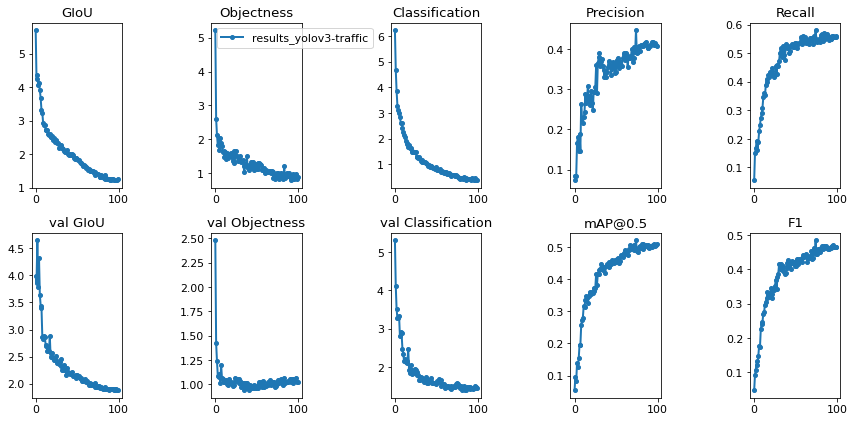

In [ ]:
from utils.utils import plot_results; 
plot_results()

In [ ]:
%cd /content/yolov3-wrapper-for-custom-data/

/content/yolov3-wrapper-for-custom-data


In [ ]:
!ls

cfg	    __pycache__			test_batch0_pred.jpg  train.shapes
data	    README.md			test.py		      train.txt
detect.py   requirements.txt		test.txt	      tutorial.ipynb
Dockerfile  results.png			traffic.data	      utils
Image.png   results_yolov3-traffic.txt	traffic.names	      valid.shapes
LICENSE     runs			train_batch0.jpg      valid.txt
models.py   test_batch0_gt.jpg		train.py	      weights


In [ ]:
# Here is the code to predict the output on test set based on the pre trained model. 
!python detect.py --save-txt \
                  --names traffic.names \
                  --img-size 1024 \
                  --cfg cfg/yolov3-spp-23cls.cfg \
                  --weights weights/best_yolov3-traffic.pt \
                  --source data/test

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp-23cls.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=1024, iou_thres=0.6, names='traffic.names', output='output', save_txt=True, source='data/test', view_img=False, weights='weights/best_yolov3-traffic.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.26649e+07 parameters, 6.26649e+07 gradients
image 1/599 data/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 1024x1024 2 buss, 1 human haulers, 2 minibuss, 1 policecars, 2 suvs, Done. (0.312s)
image 2/599 data/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 1024x1024 4 bicycles, 2 buss, 4 human haulers, 2 minibuss, 1 Pickup s, 2 policecars, 1 scooters, Done. (0.298s)
image 3/599 data/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 1024x1024 2 bicycles, 1 buss, 3 minibuss, Done. (0.300s)
image 4/599 data/test/Numan_(101)_jpg.rf.a9abd780ae62e7a

In [ ]:
!python test.py -h

usage: test.py [-h] [--cfg CFG] [--data DATA] [--weights WEIGHTS]
               [--batch-size BATCH_SIZE] [--img-size IMG_SIZE]
               [--conf-thres CONF_THRES] [--iou-thres IOU_THRES] [--save-json]
               [--task TASK] [--device DEVICE] [--single-cls] [--augment]

optional arguments:
  -h, --help            show this help message and exit
  --cfg CFG             *.cfg path
  --data DATA           *.data path
  --weights WEIGHTS     weights path
  --batch-size BATCH_SIZE
                        size of each image batch
  --img-size IMG_SIZE   inference size (pixels)
  --conf-thres CONF_THRES
                        object confidence threshold
  --iou-thres IOU_THRES
                        IOU threshold for NMS
  --save-json           save a cocoapi-compatible JSON results file
  --task TASK           'test', 'study', 'benchmark'
  --device DEVICE       device id (i.e. 0 or 0,1) or cpu
  --single-cls          train as single-class dataset
  --augment             augmen

In [ ]:
# Calling test.py to evaluate the model on validation set. 
%cd /content/yolov3-wrapper-for-custom-data/

!python test.py --data traffic.data \
                --cfg cfg/yolov3-spp-23cls.cfg \
                --weights weights/best_yolov3-traffic.pt \
                --img 1024 \
                --augment

/content/yolov3-wrapper-for-custom-data
Namespace(augment=True, batch_size=16, cfg='cfg/yolov3-spp-23cls.cfg', conf_thres=0.001, data='traffic.data', device='', img_size=1024, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/best_yolov3-traffic.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.26649e+07 parameters, 6.26649e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.26381e+07 parameters, 6.26381e+07 gradients
Caching labels valid.txt (199 found, 0 missing, 0 empty, 0 duplicate, for 199 images): 100% 199/199 [00:00<00:00, 936.08it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1:   0% 0/13 [00:00<?, ?it/s]/content/yolov3-wrapper-for-custom-data/utils/utils.py:512: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorc

In [ ]:
from models import *  
from utils.datasets import *
from utils.utils import *

def detect(save_img=False):
    imgsz = opt.img_size 
    out, source, weights, half, view_img, save_txt = opt.output, opt.source, opt.weights, opt.half, opt.view_img, opt.save_txt

    # Initialize
    device = torch_utils.select_device(opt.device)
    if os.path.exists(out):
        shutil.rmtree(out)  # delete output folder
    os.makedirs(out)  # make new output folder

    # Initialize model
    model = Darknet(opt.cfg, imgsz)

    # Load weights
    attempt_download(weights)
    if weights.endswith('.pt'):  # pytorch format
        model.load_state_dict(torch.load(weights, map_location=device)['model'])
    else:  # darknet format
        load_darknet_weights(model, weights)
        
    # Eval mode
    model.to(device).eval()

    # Half precision
    half = half and device.type != 'cpu'  # half precision only supported on CUDA
    if half:
        model.half()

    # Set Dataloader
    vid_path, vid_writer = None, None
    save_img = True
    dataset = LoadImages(source, img_size=imgsz)

    # Get names and colors
    names = load_classes(opt.names)
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(names))]

    # Run inference
    t0 = time.time()
    img = torch.zeros((1, 3, imgsz, imgsz), device=device)  # init img
    _ = model(img.half() if half else img.float()) if device.type != 'cpu' else None  # run once

    results=[]
    for path, img, im0s, vid_cap in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)

        # Inference
        t1 = torch_utils.time_synchronized()
        pred = model(img, augment=opt.augment)[0]
        t2 = torch_utils.time_synchronized()

        # to float
        if half:
            pred = pred.float()

        # Apply NMS
        pred = non_max_suppression(pred, opt.conf_thres, opt.iou_thres,
                                   multi_label=False, classes=opt.classes, agnostic=opt.agnostic_nms)

        
        # Process detections
        for i, det in enumerate(pred):  # detections for image i
            
            p, s, im0 = path, '', im0s          

            save_path = str(Path(out) / Path(p).name)
            #print(p)
            s += '%gx%g ' % img.shape[2:]  # print string
            #print(s)
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  #  normalization gain whwh
            if det is not None and len(det):
                # Rescale boxes from imgsz to im0 size
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += '%g %ss, ' % (n, names[int(c)])  # add to string

                xmin = []
                ymin = []
                xmax = []
                ymax = []
                scores = []
                labels_value=[]
                image_ids=[]
                # Write results
                for *xyxy, conf, cls in det:
                    if save_txt:  # Write to file
                        
                        conf_score = '%.2f' % (conf)
                        label_with_cls = '%s' % (names[int(cls)])
                        
                        labels_value.append(label_with_cls)
                        
                        xmin.append(int(xyxy[0]))
                        ymin.append(int(xyxy[1]))
                        xmax.append(int(xyxy[2]))
                        ymax.append(int(xyxy[3]))
                        
                        scores.append(conf_score)
                        image_ids.append(save_path)

                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        with open(save_path[:save_path.rfind('.')] + '.txt', 'a') as file:
                            file.write(('%g ' * 5 + '\n') % (cls, *xywh))  # label format

                    if save_img or view_img:  # Add bbox to image
                        label = '%s %.2f' % (names[int(cls)], conf)
                        plot_one_box(xyxy, im0, label=label, color=colors[int(cls)])

            # Print time (inference + NMS)
            print('%sDone. (%.3fs)' % (s, t2 - t1))

            # Stream results
            if view_img:
                cv2.imshow(p, im0)
                if cv2.waitKey(1) == ord('q'):  # q to quit
                    raise StopIteration

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'images':
                    cv2.imwrite(save_path, im0)
        result = {
            'image_id': image_ids,
            'score': scores,
            'class': labels_value,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax

            }

        results.append(result)

    if save_txt or save_img:
        print('Results saved to %s' % os.getcwd() + os.sep + out)

    print('Done. (%.3fs)' % (time.time() - t0))
    return results

In [ ]:
# Setting up parameters for inference /submission
class opt:
    cfg='/content/yolov3-wrapper-for-custom-data/cfg/yolov3-spp-23cls.cfg'
    names='traffic.names'
    weights='weights/best_yolov3-traffic.pt'
    source='data/test'
    save_txt=True
    output='output'  # Output directory of the results
    classes=False
    img_size=1024    # Inference Imag Size
    conf_thres=0.3
    iou_thres=0.6
    fourcc='mp4v'
    half=False
    device=''
    view_img=False
    agnostic_nms=False
    augment=False

In [ ]:
# predict results
with torch.no_grad():
    res=detect()

Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.26649e+07 parameters, 6.26649e+07 gradients
image 1/599 data/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 1024x1024 2 buss, 1 human haulers, 2 minibuss, 1 policecars, 2 suvs, Done. (0.317s)
image 2/599 data/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 1024x1024 4 bicycles, 2 buss, 4 human haulers, 2 minibuss, 1 Pickup s, 2 policecars, 1 scooters, Done. (0.315s)
image 3/599 data/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 1024x1024 2 bicycles, 1 buss, 3 minibuss, Done. (0.308s)
image 4/599 data/test/Numan_(101)_jpg.rf.a9abd780ae62e7aa8a861c7693db43a3.jpg: 1024x1024 2 Pickup s, Done. (0.315s)
image 5/599 data/test/Numan_(133)_jpg.rf.1e1ec524e09e67f50afdc03fd3ab4dca.jpg: 1024x1024 2 bicycles, 1 Pickup s, Done. (0.309s)
image 6/599 data/test/Numan_(134)_jpg.rf.0c6ae8c55579ac213d612d227bedf6d1.jpg: 1024x1024 1 taxis, Done. (0.308s)
image 7

In [ ]:
import pandas as pd
import numpy as np

append_data=[]

for i in range(len(res)):
  df = pd.DataFrame(res[i], columns = ['image_id','class','score','xmin','ymin','xmax','ymax'])
  append_data.append(df)

finl_results=pd.concat(append_data)
finl_results.image_id = [x.strip('output/') for x in finl_results.image_id]

finl_results['width'] = 1024
finl_results['height'] = 1024

print(f'Number of Objects Detected: {finl_results.shape[0]}')

# Saving the submission file with timestamp
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d %H:%M:%S")

finl_results.to_csv(f'{timestamp} submission.csv', index=False)
print('Submission file is written Successfully!\n\n Sneak Peak at Submission File :)')

finl_results.head()

Number of Objects Detected: 3157
Submission file is written Successfully!

 Sneak Peak at Submission File :)


,image_id,class,score,xmin,ymin,xmax,ymax,width,height
0,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,bus,0.91,589,680,640,756,1024,1024
1,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,suv,0.75,645,555,774,809,1024,1024
2,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,minibus,0.72,500,693,514,739,1024,1024
3,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,bus,0.67,522,688,537,723,1024,1024
4,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,suv,0.63,781,522,1017,897,1024,1024


In [ ]:
!ls

'2020-10-16 17:21:07 submission.csv'   test_batch0_gt.jpg
 cfg				       test_batch0_pred.jpg
 data				       test.py
 detect.py			       test.txt
 Dockerfile			       traffic.data
 Image.png			       traffic.names
 LICENSE			       train_batch0.jpg
 models.py			       train.py
 output				       train.shapes
 __pycache__			       train.txt
 README.md			       tutorial.ipynb
 requirements.txt		       utils
 results.png			       valid.shapes
 results_yolov3-traffic.txt	       valid.txt
 runs				       weights
